# Agglomerative Hierarchical Clustering

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading The Dataset
data = pd.read_csv('ESE/CC GENERAL.csv')
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
#Dropping the outliers or columns
data1 = data
data1 = data1.drop('CUST_ID',axis=1)
data1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
#Checking how many null values present in the dataset
data1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
#Replacing null values with 0 or mean values
#data1['MINIMUM_PAYMENTS'].replace(np.nan,data1.MINIMUM_PAYMENTS.mean(),inplace=True)
data1['MINIMUM_PAYMENTS'].replace(np.nan,0,inplace=True)
data1['CREDIT_LIMIT'].replace(np.nan,data1.CREDIT_LIMIT.mean(),inplace=True)

In [6]:
#Checking how many null values present in the dataset
data1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
#Checking how many unique values are present in dataset
data1.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         206
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [8]:
#Dropping the rows from 100 to 8950, now dataset contains only 100 rows
data2 = data1

data2 = data2.drop(range(100,8950))

In [9]:
#Normalize the dataset
from sklearn.preprocessing import normalize

data_scaled = normalize(data2)
len(data_scaled)

100

In [10]:
#Normalize the dataset
data_scaled1 = normalize(data1)
len(data_scaled1)

8950

In [11]:
data_scaled = pd.DataFrame(data_scaled, columns=data2.columns)
data_scaled.head()
len(data_scaled)

100

In [12]:
data_scaled1 = pd.DataFrame(data_scaled1, columns=data1.columns)
data_scaled1.head()
len(data_scaled1)

8950

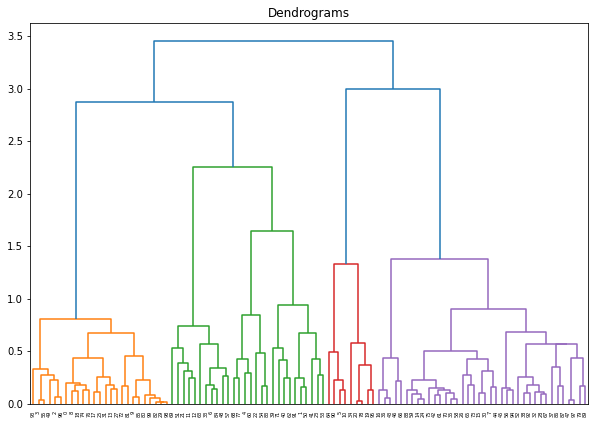

In [14]:
#Representation of dataset using Dendrogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  

plt.title("Dendrograms")  

dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

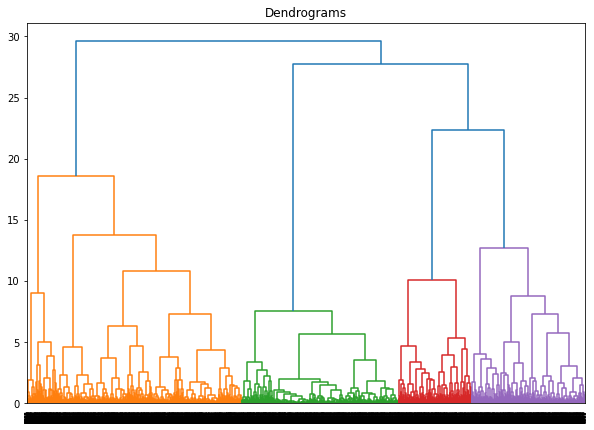

In [36]:
#Representation of dataset using Dendrogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  

plt.title("Dendrograms")  

dend = shc.dendrogram(shc.linkage(data_scaled1, method='ward'))

In [13]:
#Agglomerative Clustering using sklearn
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

In [14]:
membership = cluster.fit_predict(data_scaled)
membership

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [15]:
data1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


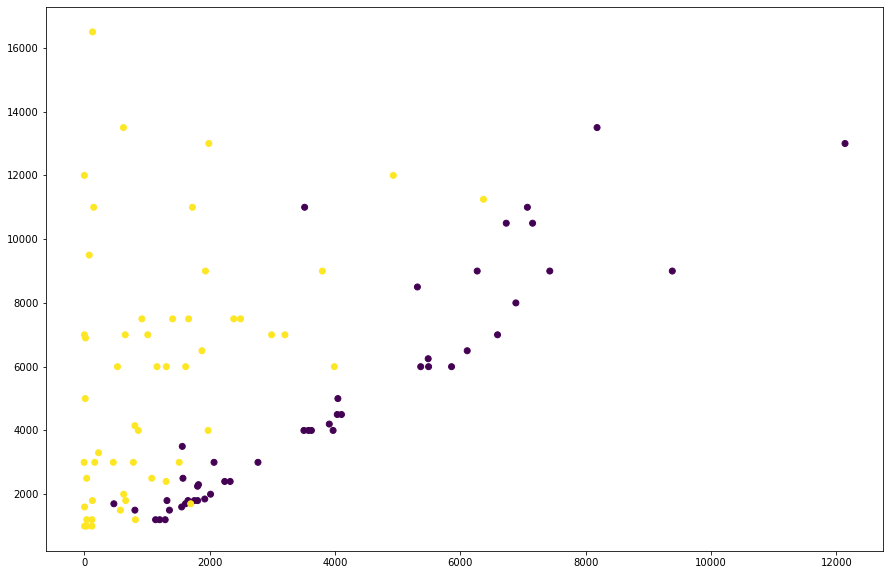

In [16]:
#Scatter plot of data-points
plt.figure(figsize=(15, 10))  

plt.scatter(data2['BALANCE'], data2['CREDIT_LIMIT'], c=cluster.labels_)

In [17]:
membership01 = cluster.fit_predict(data_scaled1)
membership01

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

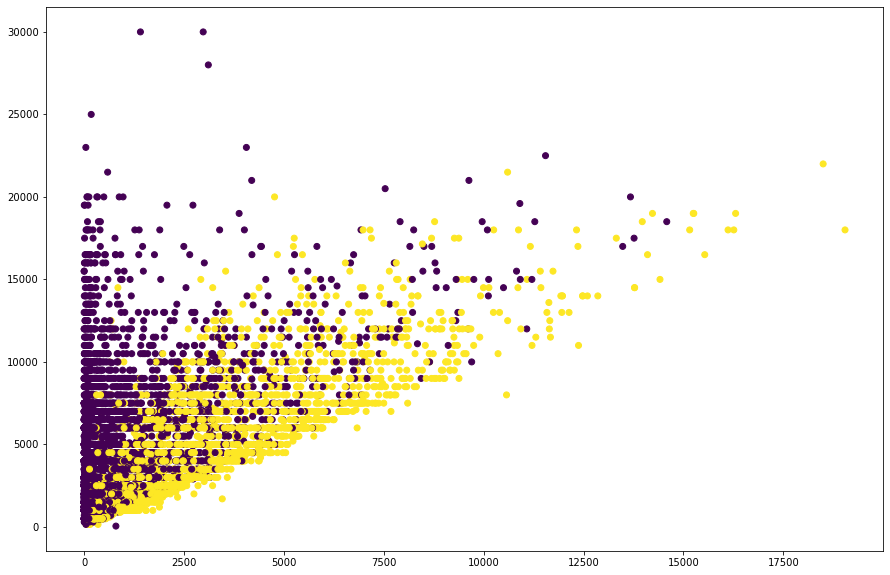

In [18]:
#Scatter plot of data-points
plt.figure(figsize=(15, 10))  

plt.scatter(data1['BALANCE'], data1['CREDIT_LIMIT'], c=cluster.labels_)

In [19]:
data1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [20]:
data2 = data1

data2.drop(range(100,8950))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1139.782882,1.000000,0.00,0.00,0.0,120.612912,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,151.823651,2906.110765,0.000000,12
96,1619.955708,1.000000,739.44,739.44,0.0,0.000000,0.666667,0.666667,0.000000,0.000000,0,11,6000.0,417.128532,389.138517,0.000000,12
97,3505.671311,1.000000,0.00,0.00,0.0,1713.984305,0.000000,0.000000,0.000000,0.500000,6,0,4000.0,0.000000,0.000000,0.000000,12
98,4.708041,0.363636,79.00,0.00,79.0,0.000000,0.250000,0.000000,0.166667,0.000000,0,3,7000.0,217.820198,121.781205,1.000000,12


In [21]:
data_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.000020,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.000000,0.001495
3,0.209047,0.000080,0.188016,0.188016,0.000000,0.025812,0.000010,0.000010,0.000000,0.000010,0.000125,0.000125,0.940708,0.000000,0.000000,0.000000,0.001505
4,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.340236,0.000299,0.000000,0.000000,0.000000,0.036004,0.000000,0.000000,0.000000,0.000025,0.000299,0.000000,0.358212,0.045321,0.867502,0.000000,0.003582
96,0.255998,0.000158,0.116852,0.116852,0.000000,0.000000,0.000105,0.000105,0.000000,0.000000,0.000000,0.001738,0.948168,0.065918,0.061495,0.000000,0.001896
97,0.627338,0.000179,0.000000,0.000000,0.000000,0.306717,0.000000,0.000000,0.000000,0.000089,0.001074,0.000000,0.715798,0.000000,0.000000,0.000000,0.002147
98,0.000672,0.000052,0.011277,0.000000,0.011277,0.000000,0.000036,0.000000,0.000024,0.000000,0.000000,0.000428,0.999236,0.031093,0.017384,0.000143,0.001713


In [22]:
#Fetching the column data from dataframe and storing it list
p,q = data_scaled['BALANCE'].values,data_scaled['BALANCE_FREQUENCY'].values
a,b = data_scaled['PURCHASES'].values,data_scaled['ONEOFF_PURCHASES'].values
c,d = data_scaled['INSTALLMENTS_PURCHASES'].values,data_scaled['CASH_ADVANCE'].values
e,f = data_scaled['PURCHASES_FREQUENCY'].values,data_scaled['ONEOFF_PURCHASES_FREQUENCY'].values
g,h = data_scaled['PURCHASES_INSTALLMENTS_FREQUENCY'].values,data_scaled['CASH_ADVANCE_FREQUENCY'].values 
p,q = data_scaled['CASH_ADVANCE_TRX'].values,data_scaled['PURCHASES_TRX'].values
r,s = data_scaled['CREDIT_LIMIT'].values,data_scaled['PAYMENTS'].values
t,u,v = data_scaled['MINIMUM_PAYMENTS'].values,data_scaled['PRC_FULL_PAYMENT'].values,data_scaled['TENURE'].values

In [23]:
x = []

for i in range(0,len(p)):
    #x = np.append([p[i],q[i]],axis=1)
    #x.append([a[i],b[i],c[i],d[i],e[i],f[i],g[i],h[i],p[i],q[i],r[i],s[i],t[i],u[i],v[i]])
    x.append([p[i],q[i],a[i],r[i],t[i]])

x

[[0.0,
  0.001924312967747082,
  0.09178972856153582,
  0.962156483873541,
  0.13423024612586662],
 [0.0003670616272064873, 0.0, 0.0, 0.6423578476113527, 0.09840373624274441],
 [0.0,
  0.0014947299071747951,
  0.09630669352752802,
  0.9342061919842469,
  0.0781351109537226],
 [0.00012542768517119168,
  0.00012542768517119168,
  0.18801610007161632,
  0.9407076387839375,
  0.0],
 [0.0,
  0.0006166996331276222,
  0.009867194130041956,
  0.7400395597531467,
  0.15096266605075684],
 [0.0,
  0.0018948008415356973,
  0.3157875082503393,
  0.4263301893455319,
  0.5701564766126839],
 [0.0,
  0.003607055424183952,
  0.39965103255379136,
  0.7608632535388024,
  0.011163041520289744],
 [0.0,
  0.003844903784333454,
  0.13976225256052105,
  0.7369398919972453,
  0.17046829179541892],
 [0.0,
  0.0006945715495236823,
  0.11967328883983142,
  0.9724001693331552,
  0.043336181676764056],
 [0.0,
  0.00026760651320294676,
  0.11432150244029884,
  0.9812238817441381,
  0.008947179533396141],
 [0.0,
  0.0

In [24]:
class Distance_computation_grid(object):
    '''
        class to enable the Computation of distance matrix 
    '''
    def __init__(self):
        pass
    
    def compute_distance(self,samples):
        '''
            Creates a matrix of distances between individual samples and clusters attained at a particular step
        '''
        Distance_mat = np.zeros((len(samples),len(samples)))
        #print("Initial Distance mat:",Distance_mat)
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        '''
            Distance calulated between two samples. The two samples can be both samples, both clusters or
            one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other 
            cases, we refer it as an exception case and pass the samples as parameter to some function that 
            calculates the necessary distance between cluster and a sample
        '''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    def intersampledist(self,s1,s2):
        '''
            To be used in case we have one sample and one cluster . It takes the help of one 
            method 'interclusterdist' to compute the distances between elements of a cluster(which are
            samples) and the actual sample given.
        '''
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)

In [25]:
X = np.array(x)
progression = [[i] for i in range(X.shape[0])]
#print("Progression: ",progression)
samples     = [[list(X[i])] for i in range(X.shape[0])]
#print("Samples: ",samples)
m = len(samples)
distcal  = Distance_computation_grid()

while m>1:
    print('Sample size before clustering    :- ',m)
    Distance_mat      = distcal.compute_distance(samples)
    #print("After Distance mat:",Distance_mat)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')

Sample size before clustering    :-  100
Cluster Node 1                   :- [29]
Cluster Node 2                   :- [98]
Progression(Current Sample)      :- [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [[29, [98]]], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [99]]
Cluster attained                 :- [[29, [98]]]
Sample size after clustering     :- 99


Sample size before clustering    :-  99
Cluster Node 1                   :- [[29, [98]]]
Cluster Node 2                   :- [82]
Progression(Current Sample) 


Sample size before clustering    :-  89
Cluster Node 1                   :- [56]
Cluster Node 2                   :- [94]
Progression(Current Sample)      :- [[0], [[1, [16]]], [2], [[3, [55]]], [[4, [88]]], [5], [6], [7], [[8, [25]]], [9], [10], [11], [12], [13], [[14, [35]]], [15], [17], [18], [19], [[20, [78]]], [21], [22], [23], [24], [26], [27], [28], [[[[29, [98]], [82]], [99]]], [30], [31], [32], [33], [34], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [[49, [96]]], [50], [51], [52], [53], [54], [[56, [94]]], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [[72, [81]]], [73], [74], [75], [76], [77], [79], [80], [83], [84], [85], [86], [87], [89], [90], [91], [92], [93], [95], [97]]
Cluster attained                 :- [[56, [94]]]
Sample size after clustering     :- 88


Sample size before clustering    :-  88
Cluster Node 1                   :- [36]
Cluster Node 2                   :- [43]
Progression(Cu

<ipython-input-24-52d0c8b4ad0a>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))


Cluster Node 1                   :- [58]
Cluster Node 2                   :- [89]
Progression(Current Sample)      :- [[0], [[1, [16]]], [[2, [[49, [96]]]]], [[3, [55]]], [[4, [88]]], [5], [6], [7], [[[8, [25]], [74]]], [9], [10], [11], [12], [13], [[14, [35]]], [15], [[17, [31]]], [18], [19], [[20, [78]]], [21], [22], [23], [24], [26], [27], [28], [[[[29, [98]], [82]], [99]]], [30], [32], [33], [34], [[36, [43]]], [37], [38], [39], [40], [41], [42], [44], [45], [46], [[47, [97]]], [48], [50], [51], [52], [53], [54], [[56, [94]]], [57], [[58, [89]]], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [[72, [81]]], [73], [75], [76], [77], [79], [80], [83], [84], [85], [86], [87], [90], [91], [92], [93], [95]]
Cluster attained                 :- [[58, [89]]]
Sample size after clustering     :- 82


Sample size before clustering    :-  82
Cluster Node 1                   :- [[14, [35]]]
Cluster Node 2                   :- [59]
Progression(Current Sample)      :-

Cluster Node 1                   :- [[[[29, [98]], [82]], [99]]]
Cluster Node 2                   :- [[80, [85]]]
Progression(Current Sample)      :- [[0], [[1, [16]]], [[[[2, [[49, [96]]]], [[[8, [25]], [74]]]], [9]]], [[[3, [55]], [[17, [31]]]]], [[[4, [88]], [92]]], [5], [6], [7], [10], [[11, [48]]], [12], [13], [[[14, [35]], [59]]], [[15, [30]]], [[18, [76]]], [19], [[20, [78]]], [21], [22], [23], [24], [26], [27], [28], [[[[[29, [98]], [82]], [99]], [[80, [85]]]]], [32], [33], [34], [[36, [43]]], [37], [38], [39], [40], [41], [42], [44], [45], [46], [[47, [97]]], [50], [51], [52], [53], [54], [[56, [94]]], [57], [[58, [89]]], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [[72, [81]]], [73], [75], [77], [79], [83], [84], [86], [87], [90], [91], [93], [95]]
Cluster attained                 :- [[[[[29, [98]], [82]], [99]], [[80, [85]]]]]
Sample size after clustering     :- 72


Sample size before clustering    :-  72
Cluster Node 1                   :- [[[[[

Cluster Node 1                   :- [7]
Cluster Node 2                   :- [[15, [30]]]
Progression(Current Sample)      :- [[0], [[1, [16]]], [[[[2, [[49, [96]]]], [[[8, [25]], [74]]]], [9]]], [[[3, [55]], [[17, [31]]]]], [[[[4, [88]], [92]], [[28, [67]]]]], [5], [6], [[7, [[15, [30]]]]], [10], [[11, [48]]], [12], [13], [[[[[14, [35]], [59]], [[58, [89]]]], [24]]], [[18, [76]]], [19], [[20, [78]]], [21], [22], [23], [[26, [61]]], [27], [[[[[[29, [98]], [82]], [99]], [[80, [85]]]], [[72, [81]]]]], [32], [33], [34], [[[36, [43]], [68]]], [37], [38], [39], [40], [41], [[42, [70]]], [44], [45], [46], [[47, [97]]], [50], [51], [52], [53], [54], [[56, [94]]], [57], [60], [62], [63], [64], [65], [66], [69], [71], [73], [75], [77], [79], [83], [84], [86], [87], [90], [91], [93], [95]]
Cluster attained                 :- [[7, [[15, [30]]]]]
Sample size after clustering     :- 63


Sample size before clustering    :-  63
Cluster Node 1                   :- [44]
Cluster Node 2                  

<ipython-input-24-52d0c8b4ad0a>:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))


ValueError: operands could not be broadcast together with shapes (2,) (5,) 

In [26]:
#Manually created data for better visualization
K = np.array([[0.40,0.53],
              [0.22,0.32],
              [0.35,0.32],
              [0.26,0.19],
              [0.08,0.41],
              [0.35,0.30],
              [0.80,0.98],
              [0.28,0.33]
])

In [27]:
progression = [[i] for i in range(K.shape[0])]
#print("Progression: ",progression)
samples     = [[list(K[i])] for i in range(K.shape[0])]
#print("Samples: ",samples)
m = len(samples)
distcal  = Distance_computation_grid()

while m>1:
    print('Sample size before clustering    :- ',m)
    Distance_mat      = distcal.compute_distance(samples)
    #print("After Distance mat:",Distance_mat)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')

Sample size before clustering    :-  8
Cluster Node 1                   :- [2]
Cluster Node 2                   :- [5]
Progression(Current Sample)      :- [[0], [1], [[2, [5]]], [3], [4], [6], [7]]
Cluster attained                 :- [[2, [5]]]
Sample size after clustering     :- 7


Sample size before clustering    :-  7
Cluster Node 1                   :- [1]
Cluster Node 2                   :- [7]
Progression(Current Sample)      :- [[0], [[1, [7]]], [[2, [5]]], [3], [4], [6]]
Cluster attained                 :- [[1, [7]]]
Sample size after clustering     :- 6


Sample size before clustering    :-  6
Cluster Node 1                   :- [[1, [7]]]
Cluster Node 2                   :- [[2, [5]]]
Progression(Current Sample)      :- [[0], [[[1, [7]], [[2, [5]]]]], [3], [4], [6]]
Cluster attained                 :- [[[1, [7]], [[2, [5]]]]]
Sample size after clustering     :- 5


Sample size before clustering    :-  5
Cluster Node 1                   :- [[[1, [7]], [[2, [5]]]]]
Cluster Nod

<ipython-input-24-52d0c8b4ad0a>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))


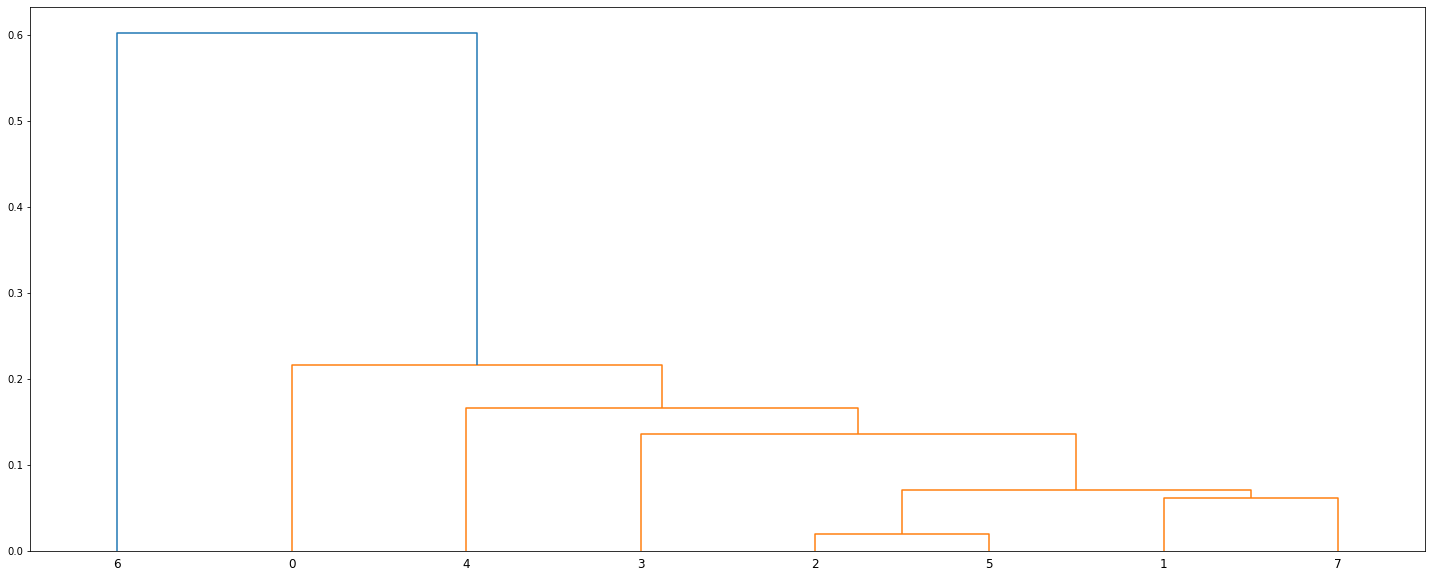

In [28]:
#Representation using Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
#print(X)
Z = linkage(K, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [29]:
k_labels = AgglomerativeClustering().fit(K)
membership1 = k_labels.labels_
membership1

array([0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [30]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [31]:
data1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [32]:
#Statistical Operation - Mean
balance_mean = data1['BALANCE'].mean()
purchase_mean = data1['PURCHASES'].mean()
creditLimit_mean = data1['CREDIT_LIMIT'].mean()
payments_mean = data1['PAYMENTS'].mean()

print("Average Account Balance Mean: ",balance_mean)
print("\nAverage Purchased Amount: ",purchase_mean)
print("\nAverage Credit Limit: ",creditLimit_mean)
print("\nAverage Payments Done: ",payments_mean)

Average Account Balance Mean:  1564.4748276781038

Average Purchased Amount:  1003.2048335195564

Average Credit Limit:  4494.449450364622

Average Payments Done:  1733.1438520248041


In [33]:
#Statistical Operation - Median
balance_median = data1['BALANCE'].median()
purchase_median = data1['PURCHASES'].median()
creditLimit_median = data1['CREDIT_LIMIT'].median()
payments_median = data1['PAYMENTS'].median()

print("Account Balance Median: ",balance_median)
print("\nPurchased Amount Median: ",purchase_median)
print("\nCredit Limit Median: ",creditLimit_median)
print("\nPayments Done Median: ",payments_median)

Account Balance Median:  873.385231

Purchased Amount Median:  361.28

Credit Limit Median:  3000.0

Payments Done Median:  856.901546


In [34]:
#Statistical Operation - Standard Deviation
balance_std = data1['BALANCE'].std()
purchase_std = data1['PURCHASES'].std()
creditLimit_std = data1['CREDIT_LIMIT'].std()
payments_std = data1['PAYMENTS'].std()

print("Account Balance Standard Deviation: ",balance_std)
print("\nPurchased Amount Standard Deviation: ",purchase_std)
print("\nCredit Limit Standard Deviation: ",creditLimit_std)
print("\nPayments Done Standard Deviation: ",payments_std)

Account Balance Standard Deviation:  2081.531879456554

Purchased Amount Standard Deviation:  2136.6347818728423

Credit Limit Standard Deviation:  3638.6124113078263

Payments Done Standard Deviation:  2895.063756904579


In [35]:
membership = cluster.fit_predict(data_scaled)
membership

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

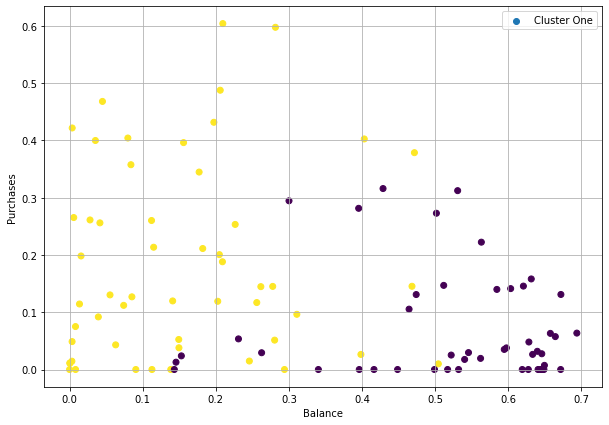

In [36]:
plt.figure(figsize=(10, 7))  

plt.scatter(data_scaled['BALANCE'], data_scaled['PURCHASES'], c=cluster.labels_)
plt.xlabel("Balance")
plt.ylabel("Purchases")
plt.legend(["Cluster One",'Cluster Two'])
plt.grid()

<AxesSubplot:>

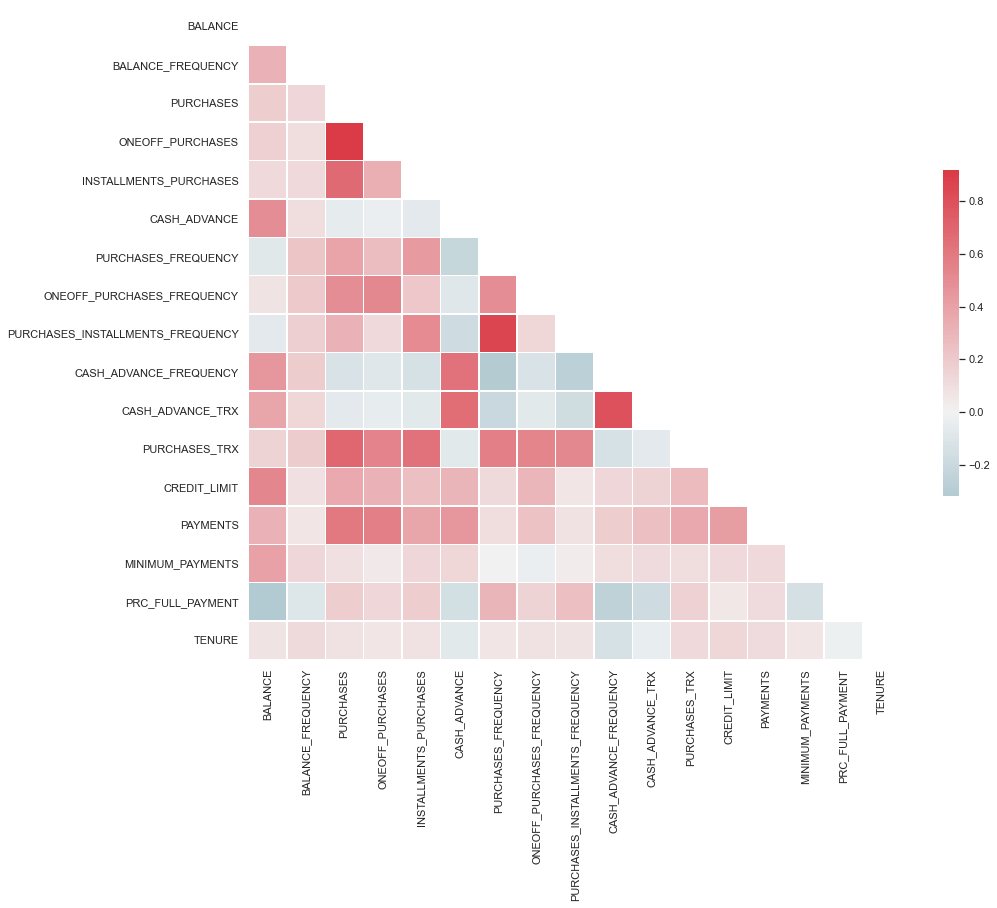

In [37]:
import seaborn as sns
sns.set(style = "white")
cor_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor_matrix, dtype = bool))

plt.figure(figsize = (15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(cor_matrix, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [38]:
#Performance Metric for clustering
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled,membership)

0.2554981754140416

In [39]:
silhouette_score(K,membership1)

0.6673074639506222

In [40]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.0,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.0,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.0,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.0,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.0,0.000000,0.000000,0.222222,1.50000
